✓ Loaded 98 waterways

Breakdown:
waterway
canal     52
drain     35
river      9
stream     1
ditch      1
Name: count, dtype: int64

✓ 66 major canals

Major canal names:
name
Adi Ganga                             5
Hooghly                               4
Circular Canal                        3
Krishnapur Canal                      3
Bagjola Canal                         2
Lead Canal                            1
south purbachal canal                 1
Panchanangram Canal                   1
Rhinocerous Enclosure                 1
Pelican, Stork and Goose Enclosure    1
Name: count, dtype: int64

✓ Files saved!


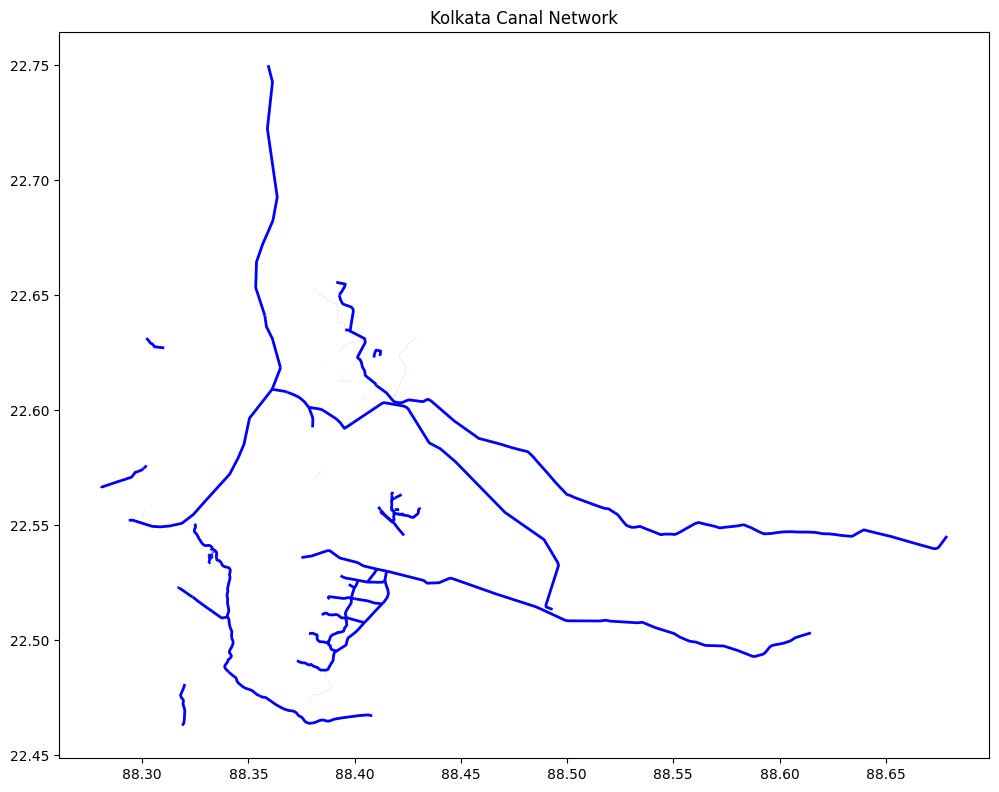

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the manually downloaded file
canals = gpd.read_file('../data/canals/kolkata_canals_manual.geojson')

print(f"✓ Loaded {len(canals)} waterways")
print(f"\nBreakdown:")
print(canals['waterway'].value_counts())

# Identify major canals
canals['is_major'] = (
    (canals.get('width', 0).astype(float) > 5) | 
    (canals['name'].notna()) |
    (canals['waterway'].isin(['canal', 'river']))
)

major_canals = canals[canals['is_major']]

print(f"\n✓ {len(major_canals)} major canals")
print("\nMajor canal names:")
print(major_canals['name'].dropna().value_counts().head(10))

# Save
canals.to_file('../data/canals/kolkata_all_waterways.geojson', driver='GeoJSON')
major_canals.to_file('../data/canals/kolkata_major_canals.geojson', driver='GeoJSON')

# Quick plot
fig, ax = plt.subplots(figsize=(12, 10))
canals[~canals['is_major']].plot(ax=ax, color='lightblue', linewidth=0.5, alpha=0.5)
major_canals.plot(ax=ax, color='blue', linewidth=2)
plt.title('Kolkata Canal Network')
plt.savefig('../data/canals/kolkata_canal_network.png', dpi=300)
print("\n✓ Files saved!")